In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
results_df = pd.read_csv('output/metrics_results_v2.csv',index_col=False)
results_df = results_df.round(3)
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1),CM
0,LR - Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.735,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]]
1,XGB - Imbalanced data,0.898,0.809,0.549,0.563,0.549,0.752,0.716,0.901,0.104,0.995,0.181,0.946,[[ 111 960]\n [ 44 8736]]
2,LGBM - Imbalanced data,0.896,0.770,0.548,0.561,0.548,0.753,0.640,0.901,0.103,0.993,0.177,0.945,[[ 110 961]\n [ 62 8718]]
3,SVM - Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.585,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]]
4,LR - SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]]
5,XGB - SMOTE,0.894,0.727,0.573,0.597,0.573,0.727,0.547,0.906,0.162,0.984,0.251,0.943,[[ 174 897]\n [ 144 8636]]
6,LGBM - SMOTE,0.892,0.709,0.590,0.616,0.590,0.734,0.508,0.909,0.204,0.976,0.291,0.942,[[ 218 853]\n [ 211 8569]]
7,SVM - SMOTE,0.717,0.579,0.673,0.571,0.673,0.739,0.217,0.940,0.617,0.729,0.321,0.821,[[ 661 410]\n [2380 6400]]
8,LR - SMOTE Tomek Links,0.682,0.573,0.673,0.552,0.673,0.738,0.204,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2773 6007]]
9,XGB - SMOTE Tomek Links,0.893,0.715,0.570,0.592,0.570,0.725,0.525,0.905,0.157,0.983,0.242,0.942,[[ 168 903]\n [ 152 8628]]


In [3]:
results_df[['Model', 'AUC', 'Precision (0)',
       'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1 (0)', 'F1 (1)']]

,Model,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1)
0,LR - Imbalanced data,0.735,0.685,0.897,0.057,0.997,0.105,0.944
1,XGB - Imbalanced data,0.752,0.716,0.901,0.104,0.995,0.181,0.946
2,LGBM - Imbalanced data,0.753,0.640,0.901,0.103,0.993,0.177,0.945
3,SVM - Imbalanced data,0.585,0.783,0.895,0.044,0.999,0.083,0.944
4,LR - SMOTE,0.738,0.203,0.943,0.660,0.683,0.310,0.792
5,XGB - SMOTE,0.727,0.547,0.906,0.162,0.984,0.251,0.943
6,LGBM - SMOTE,0.734,0.508,0.909,0.204,0.976,0.291,0.942
7,SVM - SMOTE,0.739,0.217,0.940,0.617,0.729,0.321,0.821
8,LR - SMOTE Tomek Links,0.738,0.204,0.943,0.662,0.684,0.311,0.793
9,XGB - SMOTE Tomek Links,0.725,0.525,0.905,0.157,0.983,0.242,0.942


In [4]:
columns = results_df.columns
print(columns)

Index(['Model', 'Accuracy', 'Precision (macro avg)', 'Recall (macro avg)',
       'F1 (macro avg)', 'Balanced accuracy', 'AUC', 'Precision (0)',
       'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1 (0)', 'F1 (1)', 'CM'],
      dtype='object')


In [15]:
def split_name(model):
    name_list = model.split(' - ')
    return name_list

results_df['Resampling'] = results_df['Model'].apply(lambda x: split_name(x)[1])
results_df['Algorithm'] = results_df['Model'].apply(lambda x: split_name(x)[0])
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision,Recall (0),Recall,F1 (0),F1,CM,Resampling,Algorithm
0,LR - Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.735,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]],Imbalanced data,LR
1,XGB - Imbalanced data,0.898,0.809,0.549,0.563,0.549,0.752,0.716,0.901,0.104,0.995,0.181,0.946,[[ 111 960]\n [ 44 8736]],Imbalanced data,XGB
2,LGBM - Imbalanced data,0.896,0.770,0.548,0.561,0.548,0.753,0.640,0.901,0.103,0.993,0.177,0.945,[[ 110 961]\n [ 62 8718]],Imbalanced data,LGBM
3,SVM - Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.585,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]],Imbalanced data,SVM
4,LR - SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]],SMOTE,LR
5,XGB - SMOTE,0.894,0.727,0.573,0.597,0.573,0.727,0.547,0.906,0.162,0.984,0.251,0.943,[[ 174 897]\n [ 144 8636]],SMOTE,XGB
6,LGBM - SMOTE,0.892,0.709,0.590,0.616,0.590,0.734,0.508,0.909,0.204,0.976,0.291,0.942,[[ 218 853]\n [ 211 8569]],SMOTE,LGBM
7,SVM - SMOTE,0.717,0.579,0.673,0.571,0.673,0.739,0.217,0.940,0.617,0.729,0.321,0.821,[[ 661 410]\n [2380 6400]],SMOTE,SVM
8,LR - SMOTE Tomek Links,0.682,0.573,0.673,0.552,0.673,0.738,0.204,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2773 6007]],SMOTE Tomek Links,LR
9,XGB - SMOTE Tomek Links,0.893,0.715,0.570,0.592,0.570,0.725,0.525,0.905,0.157,0.983,0.242,0.942,[[ 168 903]\n [ 152 8628]],SMOTE Tomek Links,XGB


In [16]:
results_df=results_df.rename(columns = {'F1 (1)': 'F1','Precision (1)':'Precision','Recall (1)':'Recall'})
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision,Recall (0),Recall,F1 (0),F1,CM,Resampling,Algorithm
0,LR - Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.735,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]],Imbalanced data,LR
1,XGB - Imbalanced data,0.898,0.809,0.549,0.563,0.549,0.752,0.716,0.901,0.104,0.995,0.181,0.946,[[ 111 960]\n [ 44 8736]],Imbalanced data,XGB
2,LGBM - Imbalanced data,0.896,0.770,0.548,0.561,0.548,0.753,0.640,0.901,0.103,0.993,0.177,0.945,[[ 110 961]\n [ 62 8718]],Imbalanced data,LGBM
3,SVM - Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.585,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]],Imbalanced data,SVM
4,LR - SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]],SMOTE,LR
5,XGB - SMOTE,0.894,0.727,0.573,0.597,0.573,0.727,0.547,0.906,0.162,0.984,0.251,0.943,[[ 174 897]\n [ 144 8636]],SMOTE,XGB
6,LGBM - SMOTE,0.892,0.709,0.590,0.616,0.590,0.734,0.508,0.909,0.204,0.976,0.291,0.942,[[ 218 853]\n [ 211 8569]],SMOTE,LGBM
7,SVM - SMOTE,0.717,0.579,0.673,0.571,0.673,0.739,0.217,0.940,0.617,0.729,0.321,0.821,[[ 661 410]\n [2380 6400]],SMOTE,SVM
8,LR - SMOTE Tomek Links,0.682,0.573,0.673,0.552,0.673,0.738,0.204,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2773 6007]],SMOTE Tomek Links,LR
9,XGB - SMOTE Tomek Links,0.893,0.715,0.570,0.592,0.570,0.725,0.525,0.905,0.157,0.983,0.242,0.942,[[ 168 903]\n [ 152 8628]],SMOTE Tomek Links,XGB


# 2. Model comparison

In [17]:


col_list=['Model', 'F1','AUC','Precision','Recall']
results_df[results_df['Resampling']=='Imbalanced data'][col_list]


,Model,F1,AUC,Precision,Recall
0,LR - Imbalanced data,0.944,0.735,0.897,0.997
1,XGB - Imbalanced data,0.946,0.752,0.901,0.995
2,LGBM - Imbalanced data,0.945,0.753,0.901,0.993
3,SVM - Imbalanced data,0.944,0.585,0.895,0.999


In [18]:

results_df[results_df['Resampling']=='SMOTE'][col_list]


,Model,F1,AUC,Precision,Recall
4,LR - SMOTE,0.792,0.738,0.943,0.683
5,XGB - SMOTE,0.943,0.727,0.906,0.984
6,LGBM - SMOTE,0.942,0.734,0.909,0.976
7,SVM - SMOTE,0.821,0.739,0.940,0.729


In [19]:
results_df[results_df['Resampling']=='SMOTE Tomek Links'][col_list]


,Model,F1,AUC,Precision,Recall
8,LR - SMOTE Tomek Links,0.793,0.738,0.943,0.684
9,XGB - SMOTE Tomek Links,0.942,0.725,0.905,0.983
10,LGBM - SMOTE Tomek Links,0.942,0.735,0.910,0.976
11,SVM - SMOTE Tomek Links,0.821,0.739,0.940,0.729


# 2. Resampling method comparison

SMOTE and SMOTE - Tomek Links performed equally well in terms of F1 score and AUC

In [20]:
results_df[results_df['Algorithm']=='LR'][col_list]

,Model,F1,AUC,Precision,Recall
0,LR - Imbalanced data,0.944,0.735,0.897,0.997
4,LR - SMOTE,0.792,0.738,0.943,0.683
8,LR - SMOTE Tomek Links,0.793,0.738,0.943,0.684


In [21]:
results_df[results_df['Algorithm']=='XGB'][col_list]

,Model,F1,AUC,Precision,Recall
1,XGB - Imbalanced data,0.946,0.752,0.901,0.995
5,XGB - SMOTE,0.943,0.727,0.906,0.984
9,XGB - SMOTE Tomek Links,0.942,0.725,0.905,0.983


In [22]:
results_df[results_df['Algorithm']=='LGBM'][col_list]


,Model,F1,AUC,Precision,Recall
2,LGBM - Imbalanced data,0.945,0.753,0.901,0.993
6,LGBM - SMOTE,0.942,0.734,0.909,0.976
10,LGBM - SMOTE Tomek Links,0.942,0.735,0.910,0.976


In [23]:
results_df[results_df['Algorithm']=='SVM'][col_list]

,Model,F1,AUC,Precision,Recall
3,SVM - Imbalanced data,0.944,0.585,0.895,0.999
7,SVM - SMOTE,0.821,0.739,0.940,0.729
11,SVM - SMOTE Tomek Links,0.821,0.739,0.940,0.729


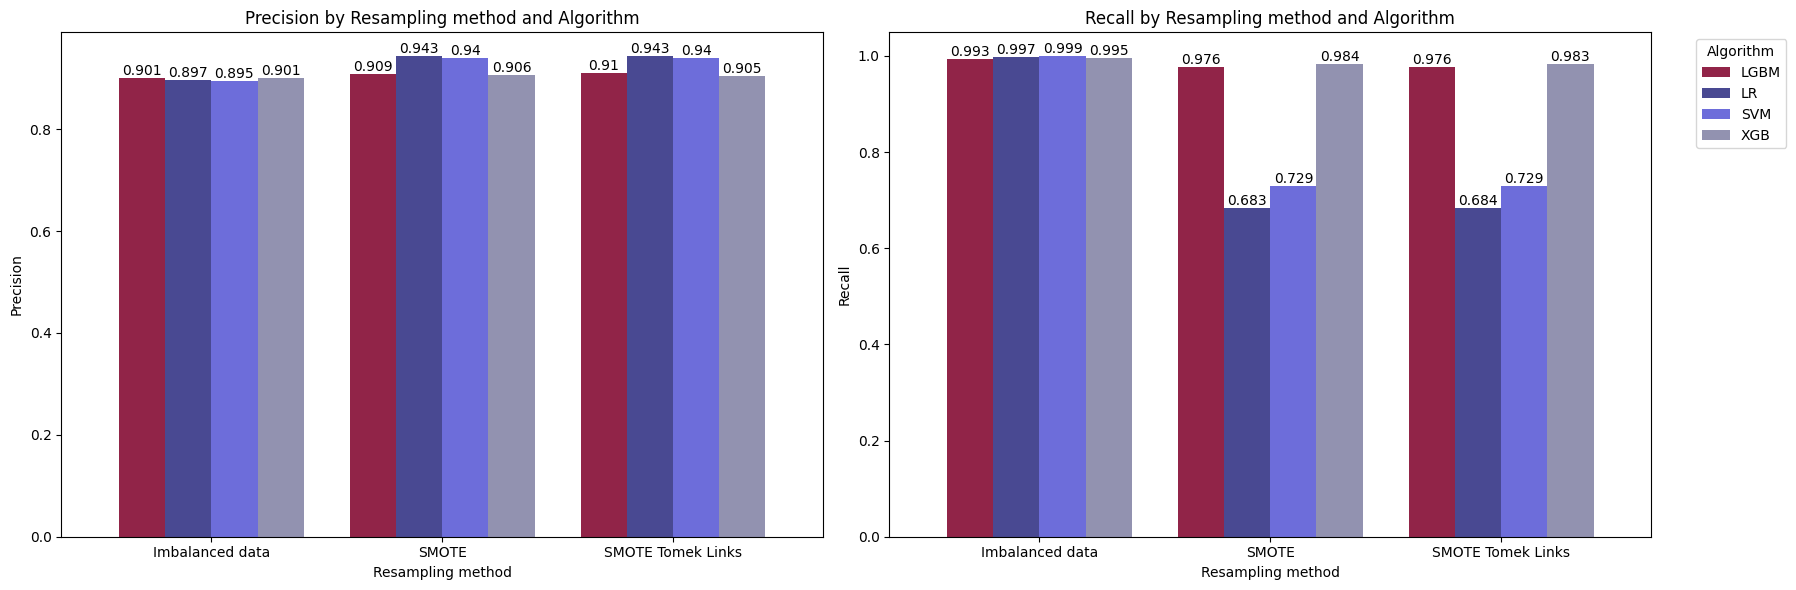

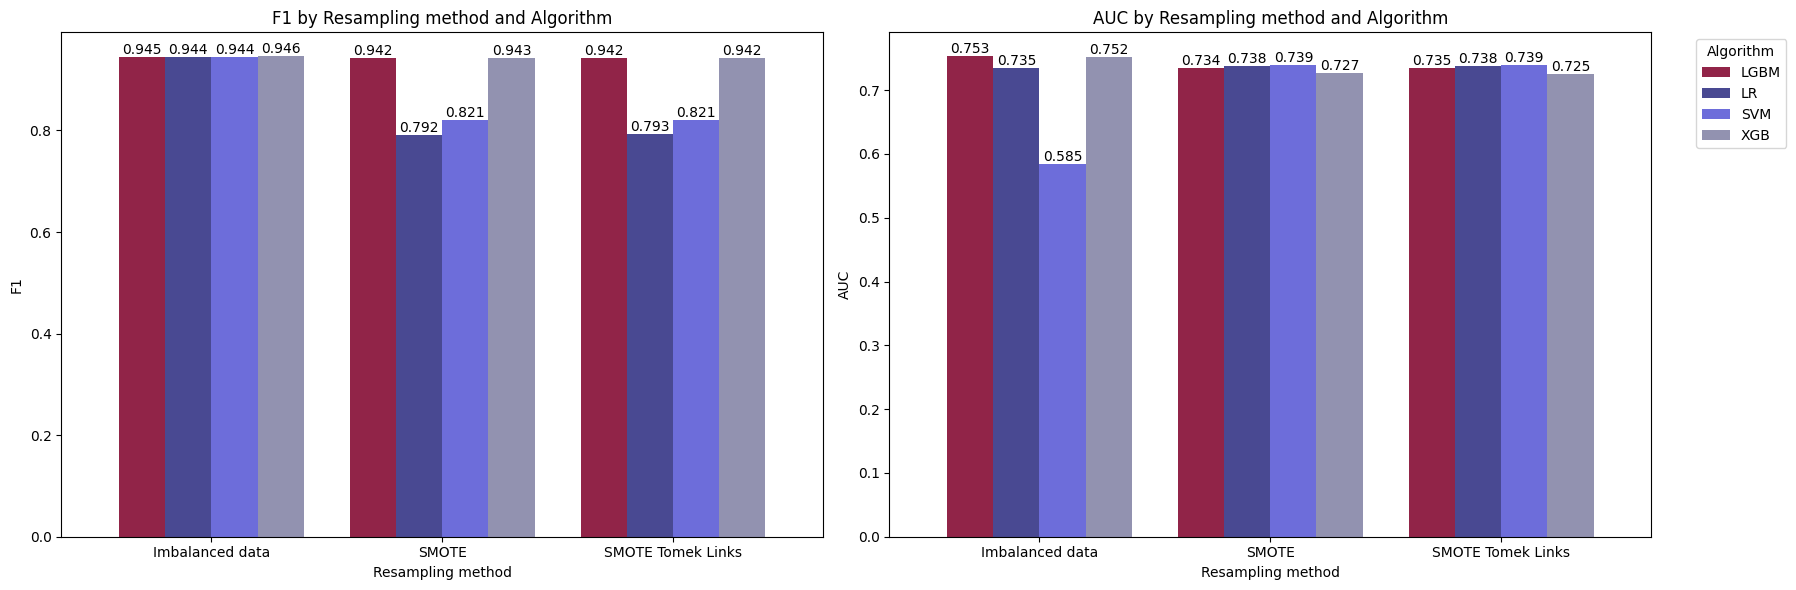

In [24]:
metrics_list_1 = ['Precision', 'Recall']
metrics_list_2 = ['F1', 'AUC']

custom_colors = sns.color_palette("gist_stern")

# Create the first plot with subplots for precision and recall
fig, axs1 = plt.subplots(1, 2, figsize=(18, 6))
for i, metric in enumerate(metrics_list_1):
    pivot_table = pd.pivot_table(results_df, values=metric, index='Resampling', columns='Algorithm')
    ax = pivot_table.plot(kind='bar', ax=axs1[i], width=0.8, color=custom_colors)
    ax.set_title(f'{metric} by Resampling method and Algorithm')
    ax.set_xlabel('Resampling method')
    ax.set_ylabel(metric)
    if i == 1:  # Only show legend for the last subplot
        ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()  # Remove legend for other subplots
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

# Create the second plot with subplots for F1 and AUC
fig, axs2 = plt.subplots(1, 2, figsize=(18, 6))
for i, metric in enumerate(metrics_list_2):
    pivot_table = pd.pivot_table(results_df, values=metric, index='Resampling', columns='Algorithm')
    ax = pivot_table.plot(kind='bar', ax=axs2[i], width=0.8, color=custom_colors)
    ax.set_title(f'{metric} by Resampling method and Algorithm')
    ax.set_xlabel('Resampling method')
    ax.set_ylabel(metric)
    if i == 1:  # Only show legend for the last subplot
        ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()  # Remove legend for other subplots
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

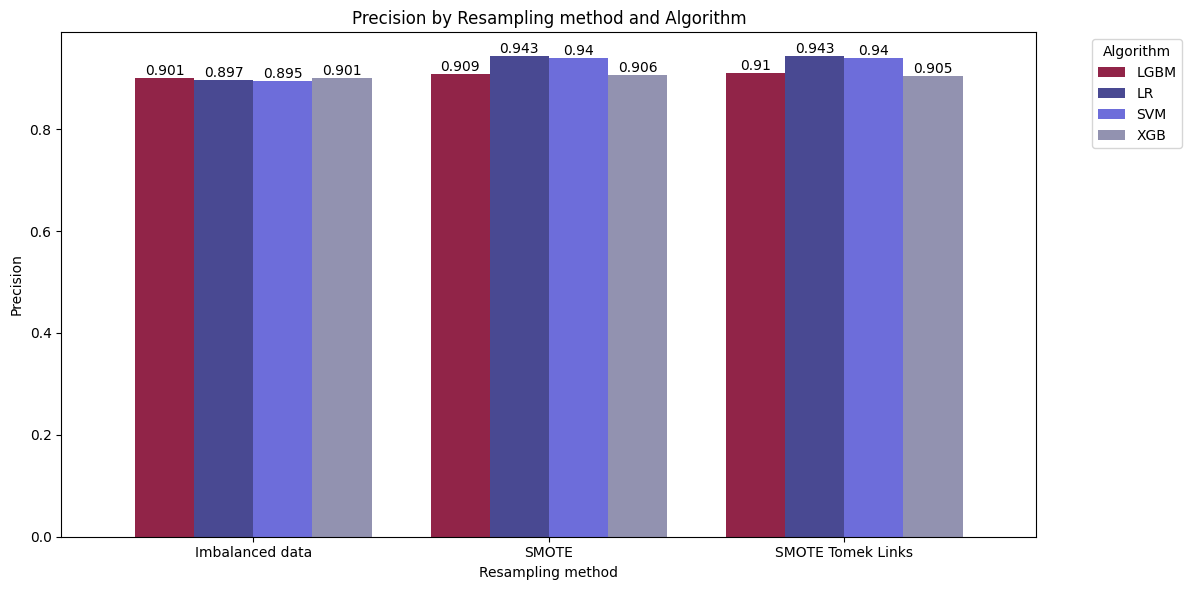

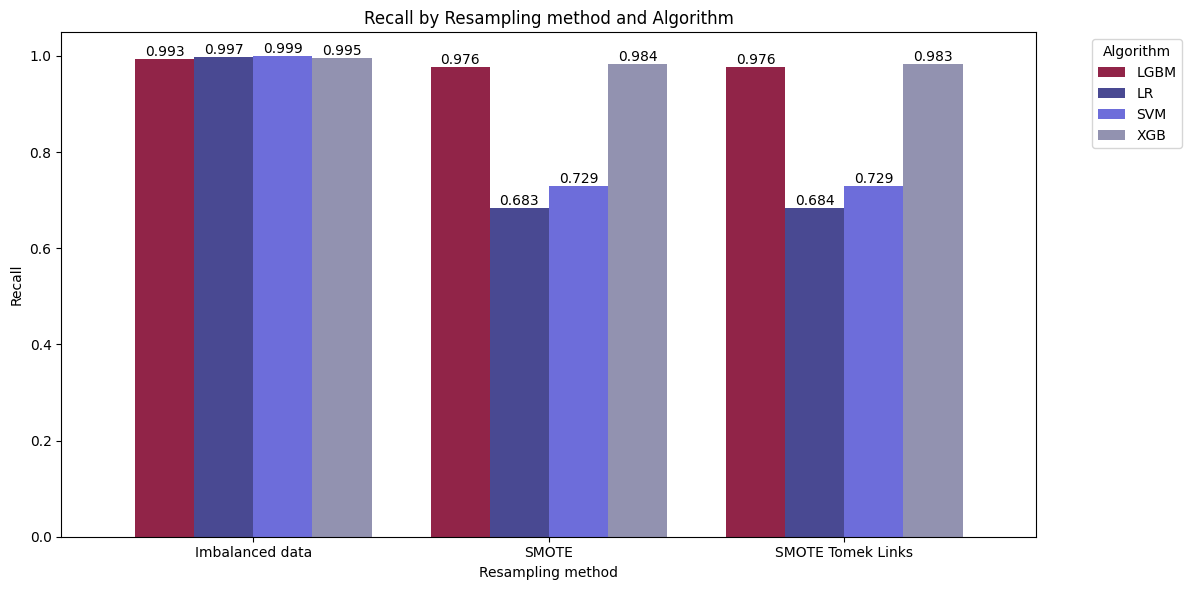

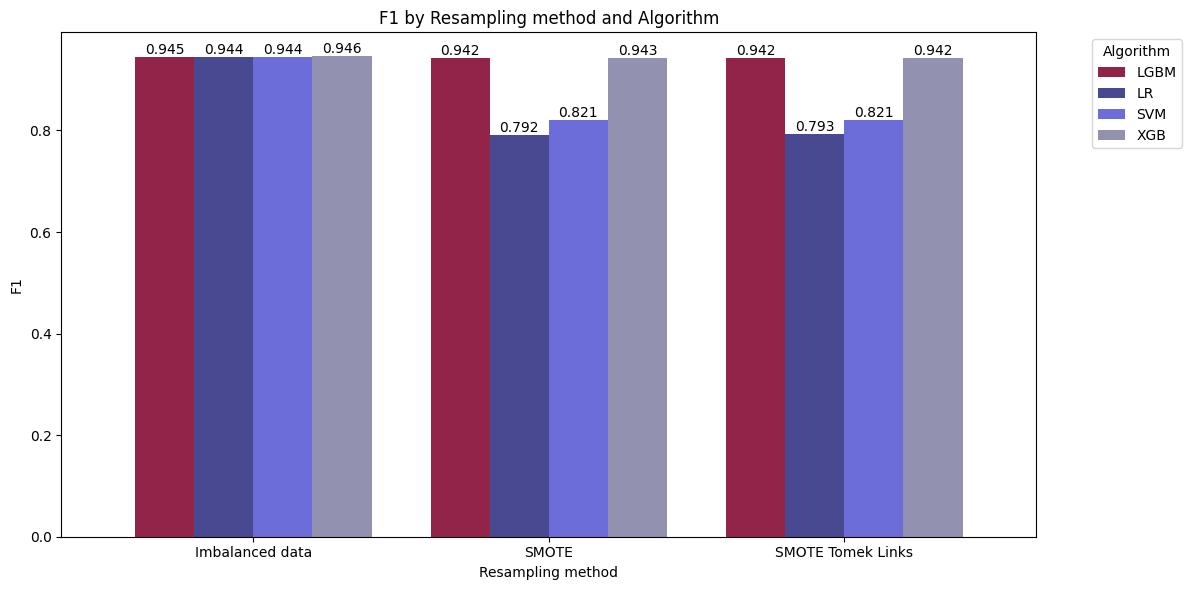

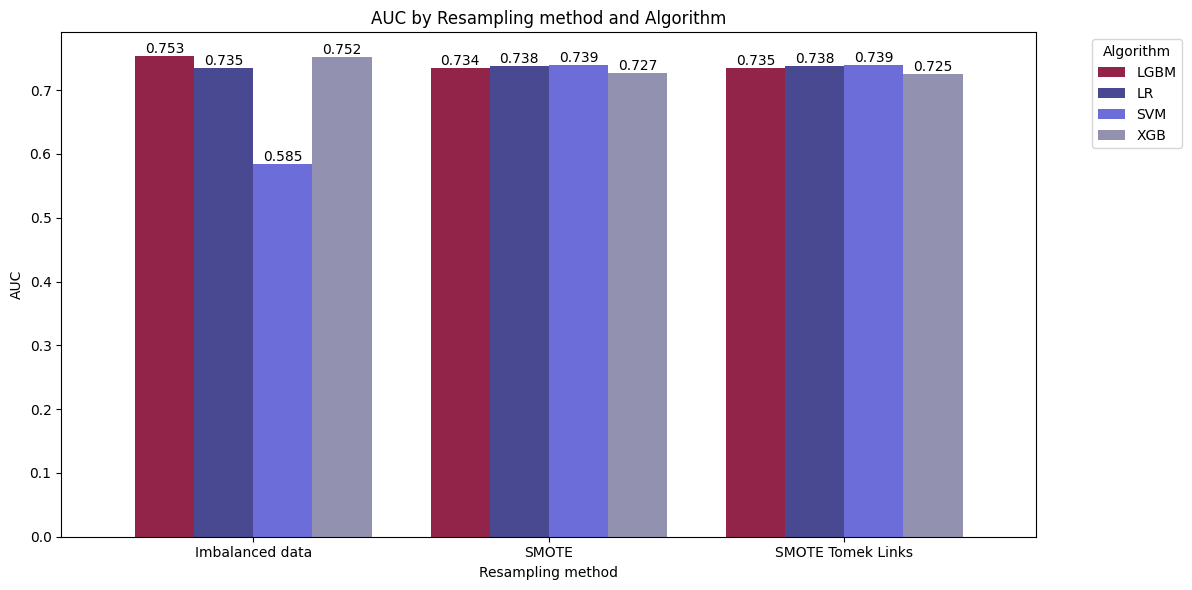

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming results_df is your DataFrame containing the metrics
metrics_list = ['Precision', 'Recall', 'F1', 'AUC']
custom_colors = sns.color_palette("gist_stern")

for metric in metrics_list:
    pivot_table = pd.pivot_table(results_df, values=metric, index='Resampling', columns='Algorithm')
    ax = pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8, color=custom_colors)
    ax.set_title(f'{metric} by Resampling method and Algorithm')
    ax.set_xlabel('Resampling method')
    ax.set_ylabel(metric)
    ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.show()
